<div style="width: 100%; text-align: center; font-size: 36px; font-weight: 600;  color: #3de642; padding: 10px 10px">Перцептрон и градиентный спуск</div>

[Англоязычный сайт про нейронные сети](http://neuralnetworksanddeeplearning.com/chap1.html)

[Перевод на хабре](https://habr.com/ru/post/456738/)


<div style="width: 100%; text-align: center; font-size: 28px; font-weight: 600;  color: #463ee6; padding-top: 10px">Общая структура искусственного нейрона</div>

![](Pictures/artifical_neuron.png)

<div style="width: 100%; text-align: center; font-size: 28px; font-weight: 600;  color: #463ee6; padding-top: 10px">Перцептрон</div>

🚩 На сегоднишний день перцепроны применяютя для решения задач с огромным количеством предикторов.

🚩 **Перцептрон** — это один из типов искусственных нейронов, который представляет собой алгоритм для выполнения двоичной классификации:
![Перцептрон. Математическая запись](Pictures/Perzeptron.png)

**b** - также можно представить как некий порог, если его превысить, то нейрон активируется

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding-top: 10px">Псевдокод алгоритма обучения перцептрона</div>

![Псевдокод обучения перцептрона](Pictures/algoritm_training.png)

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1;">Правило обновления весов эквивалентное приведенному алгоритму</div>

🚩 Позволяет компактно описать (и быстро запрограммировать) алгоритм, а иногда и ускорить вычисления. 
![Псевдокод обучения перцкптрона](Pictures/update_weights.png)
Тут **y**  — правильный ответ для текущего примера, **y^** — выходная активация перцептрона, **xi** — i-й вход перцептрона на текущем примере, **wi** —   i-й вес перцептрона, **Δwi** — изменение i-го веса после предъявления текущего примера.

### Задача с грушами. Обучение перцептрона🤩

![](Pictures/pears.png)

In [1]:
import numpy as np

In [2]:
examples = np.array([[1, 0.3, 1], [0.4, 0.5, 1], [0.7, 0.8, 0]])
print(examples)

[[1.  0.3 1. ]
 [0.4 0.5 1. ]
 [0.7 0.8 0. ]]


In [3]:
# выходные значения (груша или нет)
Y = examples[:, 2].reshape(-1, 1)
print(Y)

[[1.]
 [1.]
 [0.]]


In [4]:
# смещение
b = np.ones_like(Y)
print(b)

[[1.]
 [1.]
 [1.]]


In [5]:
# матрица значений предикаторов + смещения
X = np.hstack((b, examples[:, :2]))
print(X)

[[1.  1.  0.3]
 [1.  0.4 0.5]
 [1.  0.7 0.8]]


In [6]:
# начальные веса 1элемент - смещение, 2элемент - желтизна, 3элемент - симметричность
w = np.array([0., 0., 0.])
print(w)

[0. 0. 0.]


In [8]:
def Predict(example: int) -> int:
    # скалярное произведение векторов
    sumator = X[example].reshape(1, -1) @ w.reshape(-1, 1)
    return 1 if sumator[0, 0] > 0 else 0
   
def Target(example: int) -> int:
    return Y[example, 0]

In [9]:
perfect = False
it = 0
while not perfect:
    print("Итерация:", it)
    print(f"Весовые коэффициенты: {w}", end='\n\n')
    perfect = True
    it += 1
    for i, e in enumerate(X):
        if Predict(i) != Target(i):
            perfect = False
            if Predict(i) == 0:
                w += e
            elif Predict(i) == 1:
                w -= e
print('Конец')           

Итерация: 0
Весовые коэффициенты: [0. 0. 0.]

Итерация: 1
Весовые коэффициенты: [ 0.   0.3 -0.5]

Итерация: 2
Весовые коэффициенты: [ 0.00000000e+00  1.11022302e-16 -8.00000000e-01]

Итерация: 3
Весовые коэффициенты: [ 0.   0.3 -1.3]

Итерация: 4
Весовые коэффициенты: [ 0.   0.6 -1.8]

Итерация: 5
Весовые коэффициенты: [ 0.   0.3 -2.1]

Итерация: 6
Весовые коэффициенты: [ 0.   0.6 -2.6]

Итерация: 7
Весовые коэффициенты: [ 0.   0.9 -3.1]

Итерация: 8
Весовые коэффициенты: [ 0.   1.2 -3.6]

Итерация: 9
Весовые коэффициенты: [ 1.   1.6 -3.1]

Конец


<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1;">Геометрическая интерпретация обучения перцептрона</div>

![](Pictures/pos_neg_vectors.png)

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1;">Ограничения применения перцептрона</div>

+ Не может решить XOR проблему
+ Не может отличить два паттерна, если мы разрешаем перенос их через край 

<div style="width: 100%; text-align: center; font-size: 28px; font-weight: 600;  color: #463ee6;">Базовые типы искуственных нейронов</div>

🚩 **Искусственные нейроны** - кирпичики из которых будут строятся нейронные сети.

Приведенные ниже нейроны будут отличаться только активационной функцией.

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Линейный нейрон</div>


Переформулированная на языке искусственных нейронов модель линейной регрессии.


🚩 Применяется если на выходе хотим получить вещественное число (например рост).

![Здесь должна быть картинка](Pictures/linear_neuron.png)


Краткая запись:


![Здесь должна быть картинка](Pictures/linear_neuron_easy.png)
![Здесь должна быть картинка](Pictures/linear_graph.png)


<div style="width: 100%; text-align: center; font-size: 14px; font-weight: 300;  color: black; padding: 10px">График линейной функции активации</div>

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Перцептрон</div>

Краткая запись:

![](Pictures/Perzeptron_easy.png)
![](Pictures/porogovay_f.png)

<div style="width: 100%; text-align: center; font-size: 14px; font-weight: 300;  color: black; padding: 10px">График пороговой функции активации</div>

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Сигмоидальный нейрон</div>
🚩 Интерпритируем выходные значения как вероятности

![](Pictures/sigma.png)
![](Pictures/sigma_graph.png)

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Нейрон основанный на гиперболическом тангесе</div>
🚩Используется как стандартный нейрон

![](Pictures/th.png)
![](Pictures/th_graph.png)

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Relu (кусочно-линейный или улучшенный линейный) нейрон</div>
🚩 Применяют в сверточных нейронных сетях. В многослойных сетях работает не хуже гиперболического тангеса.

![](Pictures/relu.png)
![](Pictures/relu_graph.png)

<div style="width: 100%; text-align: left; font-size: 22px; font-weight: 600;  color: #0abb19; padding: 20px"> - Softplus нейрон</div>
🚩Позваляет дифференцировать Relu нейрон

![](Pictures/softplus.png)
![](Pictures/softplus_graph.png)

<div style="width: 100%; text-align: center; font-size: 28px; font-weight: 600;  color: #463ee6; padding-top: 10px">Градиентный спуск</div>

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1;">Целевая функция</div>

🚩 **Целевая функция** - мера того, насколько хорошо ведет себя алгоритм. Мера успешности алгоритма. Показывает насколько в целом наша модель ошибалась.

🚩 Необходимо **минимизировать** целевую функцию!

Целевую функцию также называют **функцией потерь**, но это не совсем синонимы.

Различают потери на конкретном примере *Loss funtion* или *Cost function*.
В этом случае целевая функция - это обобщенная комбинация функций потерь для отдельных примеров
![](Pictures/target_func.png)

Можно посмотреть еще:
+ Функция эмпирического риска
+ Функция стрктурного риска

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1;">Поверхность целевой функции</div>

![](Pictures/target_surf.png)
<div style="width: 100%; text-align: center; font-size: 14px; font-weight: 300;  color: black; padding: 10px">График поверхности целевой функции от 2 параметров</div>

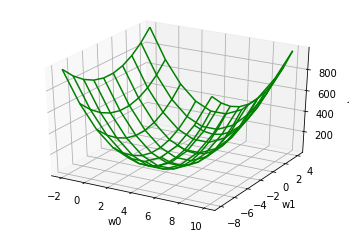

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

X = np.linspace(-6, 6, 20)/6

w_0, w_1 = 4, -2
#истинная функция
y = lambda x: w_0 + w_1 * x

w0 = np.linspace(-2, 10, 10)
w1 = np.linspace(-8, 4, 10)
W0, W1 = np.meshgrid(w0, w1)
#предсказанная функция
y_predict = lambda x: W0 + W1*x

# целевая функция
J = sum([(y_predict(x) - y(x) )**2 for x in X])

# График целевой функции
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_wireframe(W0, W1, J, color='green')
#ax.plot_surface(W0, W1, J, cmap='inferno', alpha=0.8)
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('J')


plt.show()

Мы не знаем на самом деле как выглядит поверхность целевой функции. Чтобы найти ее **минимум** используют **градиентный спуск**.

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Градиент</div>

🚩 **Градиент** - вектор, своим направлением указывающий направление наибольшего возрастания некоторой величины.

![](Pictures/gradient.png)

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Алгоритм обучения градиентного спуска</div>

1. Вычисляем значение градиента в определенной точке
2. Домножаем градиент на *-1*, чтобы получить направление наискорейшего спуска
3. Домножаем полученное значение на *альфу* - константа скорости обучения (влияет на величину шагов)
4. Прибавляем полученное к весам которые были
5. Таким образом получаем новые веса на следущем шаге алгоритма


Зададим следующее правило изменения весов:
$w_{j+1} = w_j + \Delta w_j$,

где $\Delta w_j = - \alpha\cdot \nabla J\left(w_j\right)$, обратите внимание, $w_j$ — это вектор весов на шаге алгоритма с номером *j*.

+ $\nabla J\left(w_j\right)$ — градиент J в точке $w_j$, 
+ $\alpha$ — некоторая **положительная** константа (спойлер: learning rate, то, насколько хорошо усваивается новая информация),
+ $x^{(i)}$ — вектор входных данных i-го примера, 
+ $y^{(i)}$ — правильный ответ для i-го примера, 
+ $\hat y^{(i)}$ — ответ нашей модели для примера с номером i, например, $\sigma\left(w^T x^{(i)}\right)$ для логистического нейрона или $w^T x^{(i)}$ для линейного.

![](Pictures/alg_grad_descent.png)

Алгоритм завершается когда веса перестают изменяться (градиент равен 0). На практике такое почти нереально. 
Чтобы остановить процедуру расчета:
+ Задают константу *эпсилон*. Если изменение весов меньше *эпсилон*, то завершаем расчет;
+ Задают максимальное число шагов. Когда превышаем его, то завершаем расчет.

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Замечания по алгоритму</div>

Успешность алгоритма зависит от:
+ выбора начальной точки

   🚩🚩🚩 **ВНИМАНИЕ**. Градиент может быть равен 0 на плато (ровная поверхность) не являющемся минимумом функции.
   
+ выбора константы скорости обучения
   + Если выбрать слишком большое значение, то будем перескакивать глобальный минимум;
   + Если выбрать слишком маленькое значение, то можем провалиться в "ямку" локального минимума и не выбраться из нее.

![](Pictures/global_local.png)

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Градиент для ЛИНЕЙНОГО нейрона с квадратичной целевой функцией</div>

[Вывод градиента для линейного нейрона](https://stepik.org/lesson/26104/step/6?auth=login&unit=8104)
![](Pictures/grad_linier.png)

🚩 **Стохастический градиентный спуск (mini Batch)** - подход когда используются не все данные.

+ Уменьшается время выполнения одного шага, но грдиент будет неточным
+ Есть шанс выйти из локального минимума

Крайний случай *n=1*. Так называемое **онлайн обучение**. Например удобно для обучения модели показа рекламы на вебсайте. Если появляется новый пользователь, то сразу на нем переобучаем модель и забываем его (больше не нужно хранить о нем данные).





<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Градиент для ЛОГИСТИЧЕСКОГО нейрона с квадратичной целевой функцией</div>

[Вывод градиента для логистического нейрона](https://stepik.org/lesson/26104/step/10?auth=login&unit=8104)
![](Pictures/grad_sigma.png)

<div style="width: 100%; text-align: center; font-size: 22px; font-weight: 600;  color: #f244e1; padding: 10px;">Помощники при дифференцировании</div>

Дифференцирование:
+ **Символьное**. Помогает проверить вывод формул;
+ **Численное**. Помогает проверить что полученная формула работает;
+ **Автоматическое**. Позволяет без формул получить градиет, если правильно описать работу алгоритма.

[Один из помощников - Библиотека Theano](https://pypi.org/project/Theano/)

## Практика

[Практика со степика](https://stepik.org/lesson/21776/step/1?auth=login&unit=5194)

[GitHub с исходниками](https://github.com/stacymiller/stepic_neural_networks_public)